In [34]:
import pandas as pd
import seaborn as sns
import random

In [43]:
df = pd.read_csv('./datasets/articles_data.csv.gz', compression='gzip', parse_dates=['date'])

In [44]:
df.set_index('id', inplace=True)

# Обрезаю время, оно не используется для анализа
df.date = df.date.dt.date

# Превращаю теги в массив, убираю пустые теги
df.tags = [tag for tag in df.tags.str.replace(pat="[\[\]']", repl='', regex=True).str.split(',') if tag != '']

# Создаю счетчик тегов
df['tags_count'] = df.tags.apply(len)

# Сортирую данные по дате и id
df.sort_values(['date', 'id'], inplace=True)

# Располагаю столбцы удобным образом
df = df[['date', 'tags', 'tags_count', 'text_len', 'rate', 'view', 'bookmark', 'comment', 'header']]

In [45]:
df

,date,tags,tags_count,text_len,rate,view,bookmark,comment,header
id,,,,,,,,,
1453,2006-01-16,"[поиск, реклама, технологии, контекст, партнер...",8,2355,0,4300,0,10,Mail.ru и «Яндекс» заключили стратегическое со...
1455,2006-01-19,"[широкополосный доступ, трафик, тариф, яндекс,...",7,2141,0,2400,0,3,«Яндекс» поддерживает «правильные» тарифы на и...
1454,2006-03-21,"[финансы, прибыль, доход, яндекс, реклама, ста...",8,1993,0,298,0,0,«Яндекс» удвоил доходы и прибыль
1452,2006-03-22,"[блогосфера, поиск, яндекс, релевантность, инф...",6,1785,0,261,1,0,Поиск по блогам от «Яндекса» вышел из беты
1457,2006-03-30,"[поиск, технологии, wap, информация, морфологи...",7,942,0,449,0,0,Запущен первый российский поиск по wap-ресурсам
...,...,...,...,...,...,...,...,...,...
75210,2012-07-27,"[weebly.com, wix.com, jimdo.com, webstarts.com...",9,21608,5,3600,81,7,Конкорданс западных конструкторов веб-сайтов
77502,2013-02-18,"[systemtap, linux, tools, настройка linux, *nix]",5,6054,37,19000,111,8,SystemTap в Linux
52529,2013-03-02,"[flexunit callback, adobe flash]",2,4256,0,1400,4,0,Асинхронные функции обратного вызова во FlexUnit


In [46]:
df.describe()

,tags_count,text_len,rate,view,bookmark,comment
count,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000
mean,4.833618,3599.199464,14.710015,2261.885344,13.705897,34.247227
std,2.027904,5204.553644,25.978671,6313.256283,49.617583,53.676348
min,2.000000,0.000000,-128.000000,32.000000,0.000000,0.000000
25%,3.000000,832.000000,1.000000,285.000000,0.000000,5.000000
50%,5.000000,1838.000000,7.000000,505.000000,2.000000,16.000000
75%,6.000000,4167.000000,24.000000,1200.000000,8.000000,42.000000
max,38.000000,66037.000000,127.000000,65464.000000,2381.000000,2196.000000


<AxesSubplot: xlabel='tags_count'>

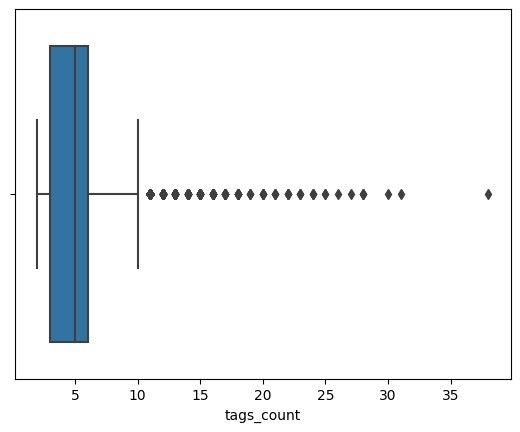

In [47]:
# Среднее количество тегов в статье 6, но есть исключения...

sns.boxplot(data=df, x='tags_count')

In [7]:
# ... разные теги имеют одно значение:
# 
# [lor, linux.org.ru]
# [fidonet, фидонет, фидо]
# [хак, хакеры, хакинг]

df.query('tags_count > 10')

,date,tags,tags_count,text_len,rate,view,bookmark,comment,header
id,,,,,,,,,
4225,2006-07-31,"[сми, журналистика, контент, cnn, люди, тв, yo...",11,4340,0,260,1,0,Телекомпания CNN создала сайт для частных инфо...
4282,2006-08-15,"[инновации, r, d, google, apple, samsung, yaho...",12,7341,0,345,0,0,Google возглавила список инновационных компаний
4493,2006-10-09,"[youtube, google, techcrunch, слухи, m, a, вид...",11,4113,0,264,0,5,"Google хочет заплатить $1,6 млрд за YouTube"
4616,2006-10-30,"[google, ии, ai, r, d, выдача, спам, поисковый...",11,6706,-1,479,6,22,Стали известны секретные планы Google на 2006 год
4663,2006-11-07,"[веб, 2.0, фламбер, 35photo, gallery, youtube,...",11,3995,-5,285,0,14,Успех YouTube вдохновил российских разработчиков
...,...,...,...,...,...,...,...,...,...
79880,2010-01-02,"[взлом, юристы, хак, хакеры, хакинг, отношения...",12,7562,-9,967,3,33,Взлом «для статьи»
79921,2010-01-03,"[печать, psutils, nix, linux, bsd, macos, evin...",11,8095,39,17000,93,64,Печатаем книги-брошюры в *nix
79936,2010-01-03,"[google, apple, 2010, web 2.0, tablet pc, real...",13,10253,3,497,7,39,Самые ожидаемые технологии 2010-го года


In [ ]:
# ! Нужно найти групповые теги и объединить их.
# Возможно такие теги чаще используются вместе, чем по отдельности.

In [26]:
tags = df['tags'].explode('tags') \
                 .reset_index() \
                 .groupby('tags', as_index=False) \
                 .agg({'index': 'count'}) \
                 .rename(columns={'tags': 'tag', 'index': 'use_count'}) \
                 .sort_values('use_count')

In [27]:
tags

,tag,use_count
21538,баяны,1
25630,евросервис,1
25629,европейское космическое аг,1
25628,европейское агентство печати,1
25626,европейский исследовательский совет,1
...,...,...
10894,microsoft,1581
42906,я пиарюсь,1886
6918,google,2486
8909,it-компании,2997


In [48]:
tags.groupby('use_count').agg({'tag': 'count'})

,tag
use_count,
1,28386
2,5839
3,2439
4,1321
5,865
...,...
1581,1
1886,1
2486,1


<AxesSubplot: xlabel='use_count', ylabel='count'>

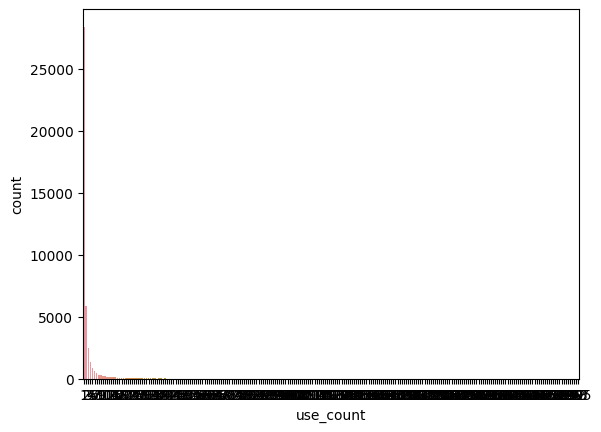

In [33]:
sns.countplot(data=tags.query('use_count < 1000'), x='use_count')

In [ ]:
# Рассчитываю параметры для тегов
tags = df.explode('tags') \
         .groupby('tags', as_index=False) \
         .agg({'id'      : 'count',
               'date'    : list,
               'rate'    : 'mean',
               'view'    : 'mean',
               'bookmark': 'mean',
               'comment' : 'mean'}) \
         .rename(columns={'tags'    : 'tag',
                           'id'      : 'count',
                           'date'    : 'dates',
                           'rate'    : 'mean_rate',
                           'view'    : 'mean_views',
                           'bookmark': 'mean_bookmarks',
                           'comment' : 'mean_comments'}) \
         .sort_values('count')

In [ ]:
# Некоторые теги встречаются очень редко, другие же - в каждой второй статье.

tags

In [ ]:
# Статей, где используется только один тег, нет.
# Можно удалить теги, которые встречаются только один раз,
# информации мы не потеряем.

df.query('tags_count == 1')

In [ ]:
tags = tags.query('count > 1 and tag != "чулан"')

In [ ]:
from collections import Counter
import itertools

tags_counter = Counter()
tags_counter.setdefault(0)

for elm in df.itertuples():    
    for tags_combination in itertools.combinations(iterable=elm.tags, r=2):
        tags_counter[tags_combination] += 1

tags_pair = pd.DataFrame.from_dict(tags_counter, orient='index') \
                        .reset_index() \
                        .rename(columns={'index': 'tags_pair', 0: 'count'}) \
                        .query('tags_pair != 0') \
                        .sort_values('count', ascending=False)

In [ ]:
tags_pair